In [1]:
%run func_def.ipynb

imports loaded.

> Pre-Processing func:
    get_height(item)
    get_weight(item)
    get_reach(item)
    get_std_reach(item, height, reach_list, height_list)
    get_age(item)
    get_std_age(item, age_list)
    get_win_prob(name, date, df)
    get_win_streak(name, date, df) #return count of recent wins
    get_lose_streak(name, date, df)
    get_fighter_stats(name, data )

> Feature Engineering func:
    get_stat(index, data, stat='height', fo='')
    get_swaped_row(index, data) # return fighter & opponent statistics swapped. 
    get_wins(combo, data)
    get_wins_ratio(combo, data)

> outlier_cleaning func:
    set_outlier_detection_model(X_columns, data)

> model_stats_pred_training func:
    set_lower_cases(string)
    set_train_test(X_columns, y_columns, data, test_size=0.3, valid_size=0.3)
    set_xgboost_reg(X_columns, y_columns, data, n=200, learning_rate=0.2, subsample=0.4, max_depth=5)
    set_predictions(model, data, X_columns, y_columns)
    get_mean_percentage_error(act,

### <span style='color:green'> **[done]** </span>Insert new fight:

In [2]:
fighter = 'Aljamain Sterling'
opponent = 'Henry Cejudo'
print(fighter + ' vs ' + opponent)

Aljamain Sterling vs Henry Cejudo


### <span style='color:green'> **[done]** </span>Load main data frame:

In [3]:
df = pd.read_csv('../data/data_features_outliers_detected.csv')
df.head(3)

,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,outlier,lof_outlier
0,lose,Arnold Allen,Max Holloway,2023-04-15,Featherweight,U-DEC,Unanimous,0.005330,-2.631500,0.013112,-0.003396,0.480496,-0.295218,0.0,-2.441848,-0.607282,-1.221133,0.163857,1.090338,0.647994,5.570234,-1.037795,True,True
1,lose,Billy Quarantillo,Edson Barboza,2023-04-15,Featherweight,KO/TKO,Knee,-1.341414,-0.090078,0.013112,-0.003396,0.643021,-0.607068,1.1,2.392919,1.126612,1.055353,-1.573881,0.198831,0.276647,0.555992,-2.057352,False,False
2,lose,Dustin Jacoby,Azamat Murzakanov,2023-04-15,Light Heavyweight,U-DEC,Unanimous,-1.341414,-0.126910,0.013112,-0.003396,-0.186416,-0.814968,0.0,0.510633,-0.854981,0.574761,0.076970,-1.724902,-0.515559,-0.558285,1.001319,False,False


#### <span style='color:green'> **[done]** </span>Load stats data frame:

In [4]:
stat = pd.read_csv('../../web_scrapers/data/ufc_fighters_stats.csv')
stat.tail(3)

,name,wins,losses,draws,height,weight,reach,stance,dob,slpm,str_acc,sapm,str_def,td_avg,td_acc,td_def,sub_avg,last_update,last_match,url
14169,Ray Wizard,0,1,0,--,--,--,NaN,--,0.0,0%,0.0,0%,0.0,0%,0%,0.0,04-18-2023,03-11-1994,http://ufcstats.com/fighter-details/ea0ad15545...
14170,Scott Morris,2,1,0,"5'10""",210lbs.,--,Orthodox,--,0.0,0%,0.0,0%,0.0,0%,0%,0.0,04-18-2023,03-11-1994,http://ufcstats.com/fighter-details/be9d259be0...
14171,Sean Daugherty,0,2,0,"6'0""",175lbs.,--,NaN,"Dec04,1975",0.0,0%,0.0,0%,0.0,0%,0%,0.0,04-18-2023,03-11-1994,http://ufcstats.com/fighter-details/a683f9ddb7...


### <span style='color:green'> **[done]** </span>Set new match:

In [5]:
match = {'result':None,
         'fighter':fighter,
         'opponent':opponent,
         'date':get_current_date(),
         'weight_class':df.weight_class[df.fighter==fighter].iloc[0],
         'method':None,
         'type':None,
         'kd_dif':None,
         'str_dif':None,
         'td_dif':None,
         'sub_dif':None,
         'td_avg_dif':None,
         'td_def_dif':None,
         'sub_avg_dif':None,
         'slpm_dif':None,
         'str_acc_dif':None,
         'sapm_dif':None,
         'str_def_dif':None,
         
         'stance_win_ratio':get_stance_wins_ratio(fighter=fighter, data=df) - get_stance_wins_ratio(fighter=opponent, data=df),
         'win_perc_dif':get_win_perc(fighter=fighter, data=df) - get_win_perc(fighter=opponent, data=df),
         'win_strk_dif':get_fighter_win_streak(fighter=fighter, data=df) - get_fighter_win_streak(fighter=opponent, data=df),
         'lose_strk_dif':get_fighter_lose_streak(fighter=fighter, data=df) - get_fighter_lose_streak(fighter=opponent, data=df),
         'outlier':None,
         'lof_outlier':None
        }

#statistic dif:
for column in ['td_avg','td_def','sub_avg','slpm','str_acc','sapm','str_def']:
    fighter_stat = stat[column][stat.name==fighter].iloc[0]
    opponent_stat = stat[column][stat.name==opponent].iloc[0]
    try:
        match[column + '_dif'] = round(fighter_stat - opponent_stat,3)
    except:
        fighter_stat = float(fighter_stat[:fighter_stat.find('%')])
        opponent_stat = float(opponent_stat[:opponent_stat.find('%')])
        match[column + '_dif'] = round((fighter_stat - opponent_stat)/100,3)
        continue  

match_df = pd.DataFrame(data=match,index=[0])
match_df

,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,outlier,lof_outlier
0,None,Aljamain Sterling,Henry Cejudo,2023-05-17,Bantamweight,None,None,None,None,None,None,-0.14,-0.52,0.7,0.78,0.06,-0.59,-0.04,0.0,-0.009,2,0,None,None


### <span style='color:green'> **[done]** </span>Loading prediction Models:

In [6]:
weight = match['weight_class'].lower()
stat_pred = load_trained_model(file_path='../global_variables/stats_pred_' + weight + '_xgboost_reg.pkl')
X = stat_pred.feature_names_in_

y = ['kd_dif','str_dif','td_dif','sub_dif']
feature_importance = stat_pred.feature_importances_

fi = pd.DataFrame(data=feature_importance, index=X, columns=['feature_importances']).sort_values(by=['feature_importances'], ascending=False)
print('Model loaded: %s\n' %stat_pred)
fi

Model loaded: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=11, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)



,feature_importances
win_perc_dif,0.114288
str_acc_dif,0.110640
sapm_dif,0.108749
slpm_dif,0.106452
win_strk_dif,0.105208
str_def_dif,0.088786
stance_win_ratio,0.087315
lose_strk_dif,0.085344
sub_avg_dif,0.079834
td_def_dif,0.068963


#### <span style='color:green'> **[done]** </span>Predict fight statistics:

In [7]:
stats_pred_list = stat_pred.predict(match_df[stat_pred.feature_names_in_])

i = 0
for stat in ['kd_dif','str_dif','td_dif','sub_dif']:
    match_df.loc[0,stat] = stats_pred_list[0][i]
    i += 1

match_df

,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,outlier,lof_outlier
0,None,Aljamain Sterling,Henry Cejudo,2023-05-17,Bantamweight,None,None,3.275559,0.486548,0.369135,0.369859,-0.14,-0.52,0.7,0.78,0.06,-0.59,-0.04,0.0,-0.009,2,0,None,None


#### <span style='color:green'> **[done]** </span>Predict winner:

In [8]:
result_pred = load_trained_model(file_path='../global_variables/result_pred_' + weight + '_logistic_reg.pkl')
X = result_pred.feature_names_in_
y = ['result']
coef = result_pred.coef_

print('Model loaded: %s\n' %result_pred)

Model loaded: LogisticRegression(C=0.25)



In [9]:
match_df.loc[0,'result'] = result_pred.predict(match_df[result_pred.feature_names_in_])
match_df

,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,outlier,lof_outlier
0,win,Aljamain Sterling,Henry Cejudo,2023-05-17,Bantamweight,None,None,3.275559,0.486548,0.369135,0.369859,-0.14,-0.52,0.7,0.78,0.06,-0.59,-0.04,0.0,-0.009,2,0,None,None


#### <span style='color:green'> **[done]** </span>Model Visualization:

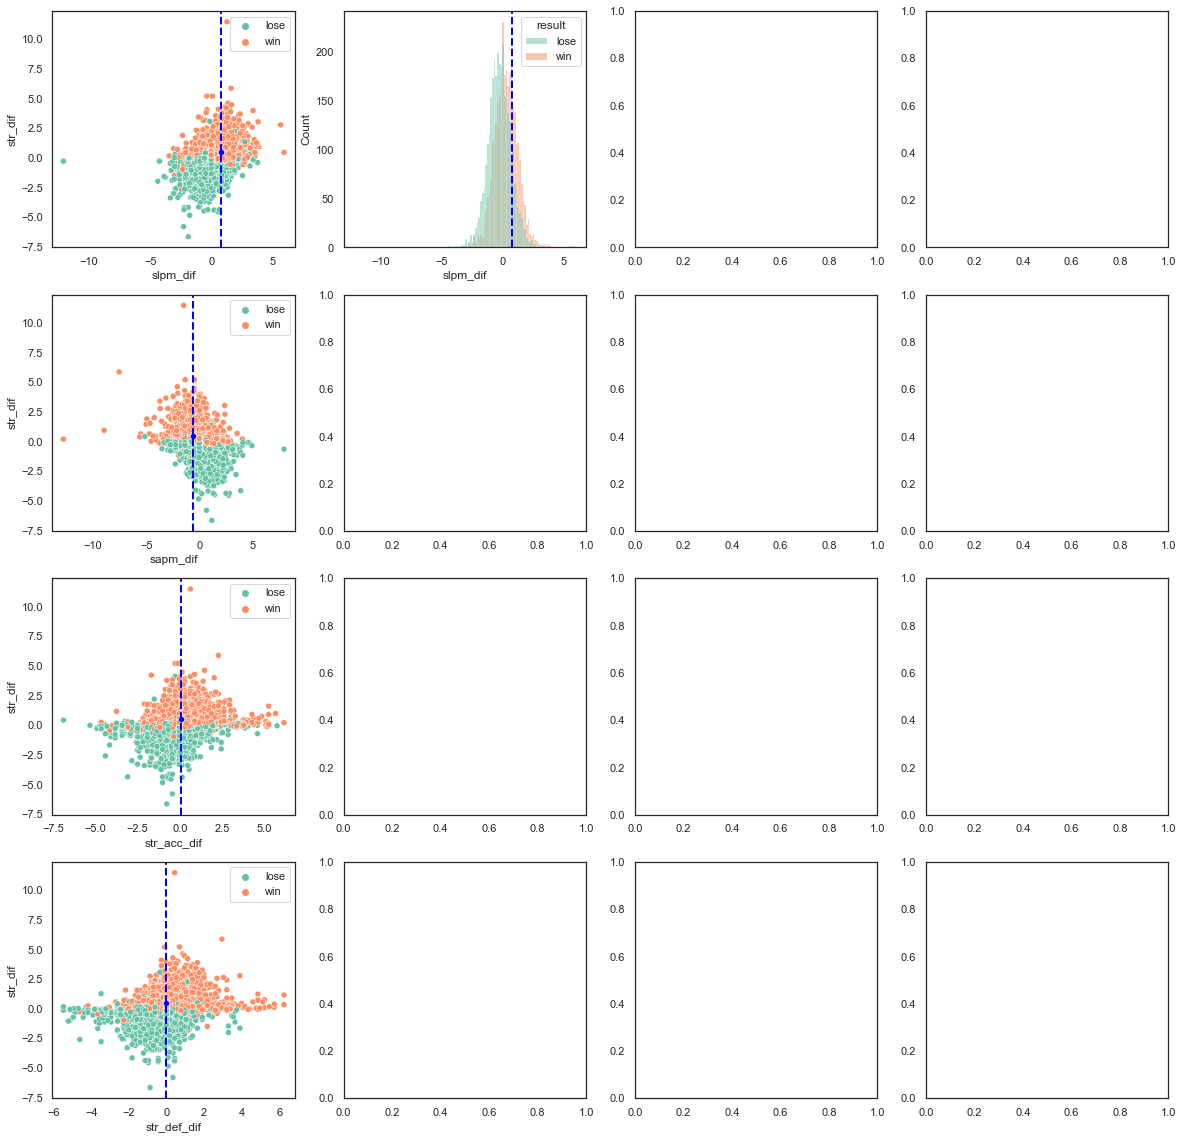

In [42]:
rows=4
cols=4
sns.set_palette("Set2")
#sns.set_style('white')
fig, axs = plt.subplots(rows,cols,figsize = (20,20))
COLOR='blue'

y,x = 'str_dif','slpm_dif'
i,j = 0,0
sns.scatterplot(ax=axs[i,j], x=x, y=y, data=df, hue='result')
sns.scatterplot(ax=axs[i,j], x=x, y=y, data=match_df,color=COLOR, markers='o')
axs[i,j].axvline(x=match_df.loc[0,x], color=COLOR, linestyle='--')
sns.histplot(ax=axs[i,j+1], data=df,x=x, hue='result')
axs[i,j+1].axvline(x=match_df.loc[0,x], color=COLOR, linestyle='--')

y,x = 'str_dif','sapm_dif'
i,j = 1,0
sns.scatterplot(ax=axs[i,j], x=x, y=y, data=df, hue='result')
sns.scatterplot(ax=axs[i,j], x=x, y=y, data=match_df,color=COLOR, markers='o')
axs[i,j].axvline(x=match_df.loc[0,x], color=COLOR, linestyle='--')

y,x = 'str_dif','str_acc_dif'
i,j = 2,0
sns.scatterplot(ax=axs[i,j], x=x, y=y, data=df, hue='result')
sns.scatterplot(ax=axs[i,j], x=x, y=y, data=match_df,color=COLOR, markers='o')
axs[i,j].axvline(x=match_df.loc[0,x], color=COLOR, linestyle='--')

y,x = 'str_dif','str_def_dif'
i,j = 3,0
sns.scatterplot(ax=axs[i,j], x=x, y=y, data=df, hue='result')
sns.scatterplot(ax=axs[i,j], x=x, y=y, data=match_df,color=COLOR, markers='o')
axs[i,j].axvline(x=match_df.loc[0,x], color=COLOR, linestyle='--')

#### <span style='color:green'> **[done]** </span>Predict method:

In [ ]:
method_pred = load_trained_model(file_path='../global_variables/method_pred_knn_classifier.pkl')
method_pred
#fi = pd.DataFrame(data=feature_importance, index=X, columns=['feature_importances']).sort_values(by=['feature_importances'], ascending=False)
#print('Model loaded: %s\n' %stat_pred)
#fi

In [ ]:
#convert to method model feature:
if match_df.loc[0,'result'] == 'win':
    match_df.loc[0,'result'] = int(1)
else:
    match_df.loc[0,'result'] = int(0)


match_df.loc[0,'method'] = method_pred.predict(match_df[method_pred.feature_names_in_])
match_df

In [10]:
>>>>>>>>>>>>>>>>>

SyntaxError: invalid syntax (3913787492.py, line 1)